# Model Training Module

Now that we have our cleaned dataset, we can finally start training our models to predict real estate price.

Importing important libraries


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Import specified linear algorithms
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import specified ensemble algorithms 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

%matplotlib inline

In [16]:
df = pd.read_csv('training_data.csv')
df = df.drop(columns=['хаяг'])
df.shape

(5330, 34)

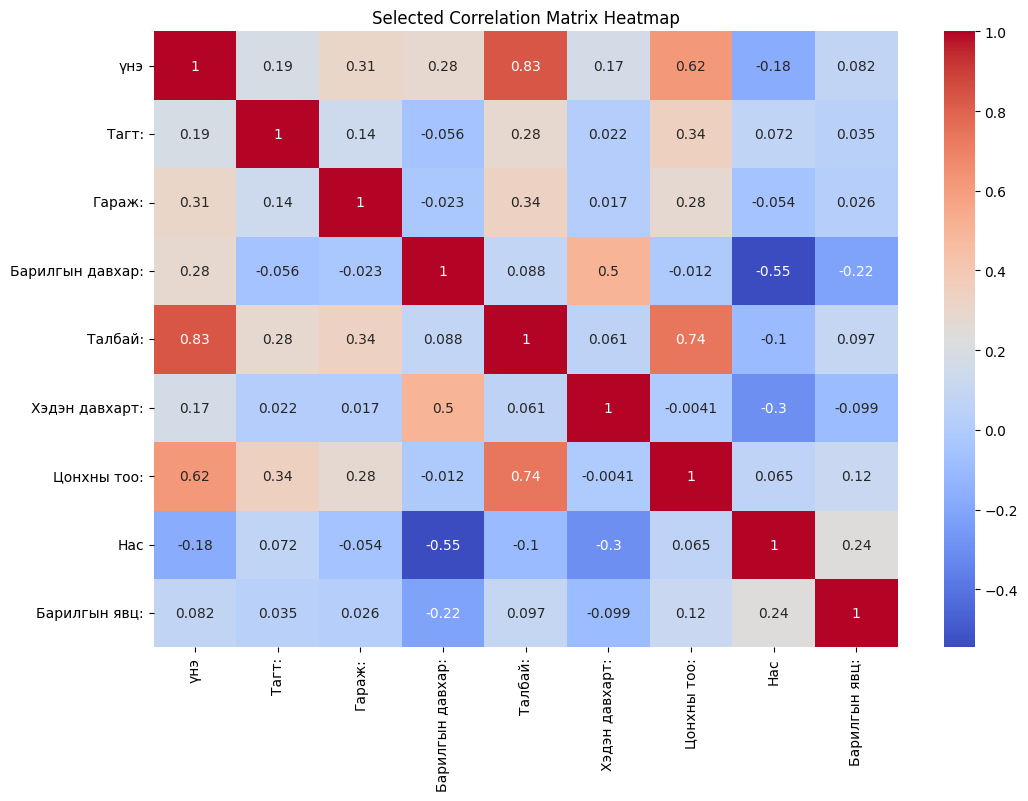

In [17]:
correlation_matrix = df.corr()

# Select specific columns and rows for the heatmap
selected_columns = ['үнэ', 'Тагт:', 'Гараж:', 'Барилгын давхар:', 'Талбай:', 'Хэдэн давхарт:', 'Цонхны тоо:', 'Нас', 'Барилгын явц:']
correlation_matrix_selected = correlation_matrix.loc[selected_columns, selected_columns]

# Display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm')
plt.title('Selected Correlation Matrix Heatmap')
plt.show()

# Split Dataset for training and testing.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# object for our target variable

y = df['үнэ']

# seperate object for our input features

X = df.drop('үнэ', axis=1)

In [20]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# verify length of each set
len(X_train), len(X_test), len(y_train), len(y_test)

(4264, 1066, 4264, 1066)

# Model Pipeline


In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [22]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error = ", mae)
print("Training Accuracy = ", linear.score(X_train, y_train))
print("Test Accuracy     = ", linear.score(X_test, y_test))

Mean Absolute Error =  68.54502674159437
Training Accuracy =  0.7610697757545168
Test Accuracy     =  0.7466088275296585


### Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_split=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error = ", mae)
print("Training Accuracy = ", dt.score(X_train, y_train))
print("Test Accuracy     = ", dt.score(X_test, y_test))

Mean Absolute Error =  53.09602575609757
Training Accuracy =  1.0
Test Accuracy     =  0.7541055969764878


### Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, max_depth=5, random_state = 12)
rf.fit(X_train, y_train);
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error = ", mae)
print("Training Accuracy = ", rf.score(X_train, y_train))
print("Test Accuracy     = ", rf.score(X_test, y_test))

Mean Absolute Error =  55.2154540675011
Training Accuracy =  0.8361042638903161
Test Accuracy     =  0.8058338493907393


### Polynomial Features

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assuming X_train, y_train, X_test, y_test are already defined

# Define the pipeline and train model
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('rf', RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=12))])
poly_model.fit(X_train, y_train)

# Predict on test data
y_pred = poly_model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error =", mae)

# Calculate the Score
print("Training Accuracy =", poly_model.score(X_train, y_train))
print("Test Accuracy     =", poly_model.score(X_test, y_test))

Mean Absolute Error = 53.42224695359294
Training Accuracy = 0.8523215311322855
Test Accuracy     = 0.8225036517570986


In [27]:
# lasso hyperparameters
lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}   

# ridge hyperparameters
ridge_hyperparameters = {
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

# elastic net hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

# random forest hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features' : ['auto', 'sqrt', 0.33]
}

# gradient boost hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth' : [1, 3, 5]
}

In [28]:
hyperparameters = {
    'rf' : rf_hyperparameters, 
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
fitted_models = {}

for name, pipeline in pipelines.items():
    # create cross-validation object 
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)

    # fite model on X_train, y_train
    model.fit(X_train, y_train)

    # store model in dictionary
    fitted_models[name] = model

    # print message after model has been fitted
    print(name, 'has been fitted.')

/Users/brsbold/Documents/And Global Intern/First Task GIt Clone/TestProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.522e+05, tolerance: 1.286e+04
  model = cd_fast.enet_coordinate_descent(
/Users/brsbold/Documents/And Global Intern/First Task GIt Clone/TestProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.715e+04, tolerance: 1.284e+04
  model = cd_fast.enet_coordinate_descent(
/Users/brsbold/Documents/And Global Intern/First Task GIt Clone/TestProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: Con

lasso has been fitted.
ridge has been fitted.


/Users/brsbold/Documents/And Global Intern/First Task GIt Clone/TestProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.119e+07, tolerance: 1.270e+04
  model = cd_fast.enet_coordinate_descent(
/Users/brsbold/Documents/And Global Intern/First Task GIt Clone/TestProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.113e+07, tolerance: 1.270e+04
  model = cd_fast.enet_coordinate_descent(
/Users/brsbold/Documents/And Global Intern/First Task GIt Clone/TestProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: Con

enet has been fitted.


/Users/brsbold/Documents/And Global Intern/First Task GIt Clone/TestProject/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/brsbold/Documents/And Global Intern/First Task GIt Clone/TestProject/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/brsbold/Documents/And Global Intern/First Task GIt Clone/TestProject/venv/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_meth

rf has been fitted.
gb has been fitted.


In [31]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [32]:
# display the average R^2 score for each model
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.7530261557659138
ridge 0.7527176313745577
enet 0.7529547607731315
rf 0.8698396402646038
gb 0.8802468638061647


In [33]:
from sklearn.metrics import r2_score

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print(name)
    print('--------')
    print('R^2:', r2_score(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))

lasso
--------
R^2: 0.7463678108067714
MAE: 68.47900904593534
ridge
--------
R^2: 0.7466353804577588
MAE: 68.56110778265302
enet
--------
R^2: 0.7465993960313948
MAE: 68.61261719484648
rf
--------
R^2: 0.87773585332155
MAE: 43.400431268459464
gb
--------
R^2: 0.8769732960567018
MAE: 43.72524183949968
